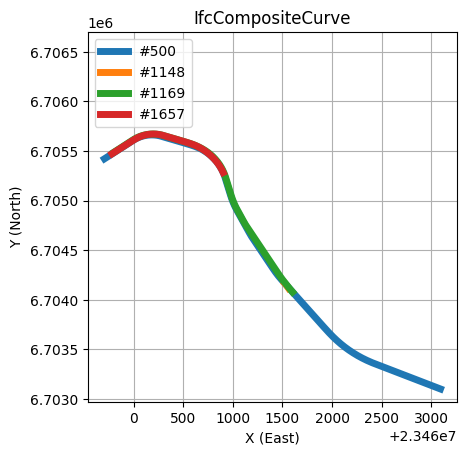

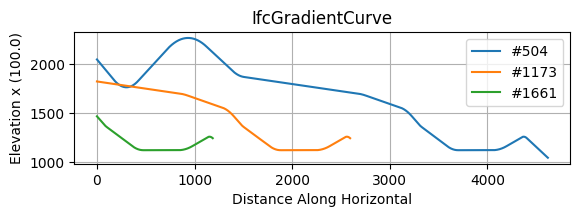

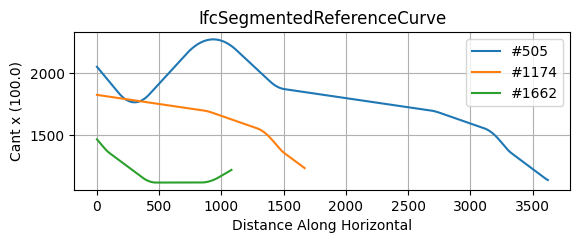

In [20]:
import ifcopenshell
import ifcopenshell.geom as geom
import ifcopenshell.ifcopenshell_wrapper as wrapper
import numpy as np
import matplotlib.pyplot as plt
import math
import ifcopenshell.api.alignment

    
#model = ifcopenshell.open("F:\\IfcAlignmentAPI\\Exit_Turnout_Huni_Valley_Station.ifc")
model = ifcopenshell.open("F:\\LX2IFC\\FTIA_LandXML\\3C03_Geom_Kupittaa-Turku_patch2.ifc")

alignment = model.by_type("IfcAlignment")[0]
#ifcopenshell.api.alignment.util.print_alignment_deep(alignment)

unit_scale = ifcopenshell.util.unit.calculate_unit_scale(model)

vertical_scale = 100.

settings = geom.settings()

fig1 = plt.figure().add_subplot()
hcurves = model.by_type("IfcCompositeCurve",False)
for hc in hcurves:
    #print(hc)
    shape = geom.create_shape(settings,hc)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    x *= unit_scale
    y *= unit_scale
    z *= unit_scale * vertical_scale
    fig1.plot(x,y,linewidth=5,label="#" + str(hc.id()))

fig2 = plt.figure().add_subplot()
vcurves = model.by_type("IfcGradientCurve",False)
for vc in vcurves:
    gradient_curve = ifcopenshell.ifcopenshell_wrapper.map_shape(settings,vc.wrapped_data)
    evaluator = ifcopenshell.ifcopenshell_wrapper.function_item_evaluator(settings,gradient_curve)
    distances = evaluator.evaluation_points()
    
    shape = geom.create_shape(settings,vc)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    x *= unit_scale
    y *= unit_scale
    z *= unit_scale * vertical_scale
    fig2.plot(distances,z,label="#" + str(vc.id()))


fig3 = plt.figure().add_subplot()
ccurves = model.by_type("IfcSegmentedReferenceCurve",False)
for cc in ccurves:
    cant_curve = ifcopenshell.ifcopenshell_wrapper.map_shape(settings,cc.wrapped_data)
    evaluator = ifcopenshell.ifcopenshell_wrapper.function_item_evaluator(settings,cant_curve)
    distances = evaluator.evaluation_points()

    shape = geom.create_shape(settings,cc)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    x *= unit_scale
    y *= unit_scale
    z *= unit_scale * vertical_scale
        
    fig3.plot(distances,z,label="#" + str(cc.id()))


fig1.set_title("IfcCompositeCurve")
fig1.legend(loc="upper left")
fig1.axis("square")
fig1.set_aspect('equal',adjustable='box')
fig1.set_xlabel("X (East)")
fig1.set_ylabel("Y (North)")
fig1.grid(True)

fig2.set_title("IfcGradientCurve")
fig2.legend(loc="upper right")
#fig2.axis("square")
fig2.set_aspect('equal',adjustable='box')
fig2.set_xlabel("Distance Along Horizontal")
fig2.set_ylabel("Elevation x ("+str(vertical_scale) + ")")
fig2.grid(True)

fig3.set_title("IfcSegmentedReferenceCurve")
fig3.legend(loc="upper right")
#fig3.axis("square")
fig3.set_aspect('equal',adjustable='box')
fig3.set_xlabel("Distance Along Horizontal")
fig3.set_ylabel("Cant x ("+str(vertical_scale) + ")")
fig3.grid(True)

plt.show()